In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
%pip install psycopg2


In [3]:
from db_utils import DataTransform, load_local_loan_payments_data, DataFrameInfo, RDSDatabaseConnector
from eda_tools import DataAnalyzer, DataProcessor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
rds_connector = RDSDatabaseConnector()
loan_payments_rds = rds_connector.extract_loan_payments_data()

local_loan_payments = load_local_loan_payments_data()

Data saved to loan_payments.csv
Shape of the DataFrame: (54231, 43)
Sample of the DataFrame:
         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date la

In [5]:
# Perform transformations and analysis as needed
transformer = DataTransform(local_loan_payments)
transformer.convert_to_numeric('loan_amount')    
info_extractor = DataFrameInfo(local_loan_payments)
info_extractor.describe_all_columns()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,...,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,5.423100e+04,5.423100e+04,54231.000000,51224.000000,54231.000000,49062.000000,54231.000000,5.423100e+04,54231.000000,54231.000000,...,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54180.000000,7499.000000,54231.0
mean,7.621797e+06,8.655350e+06,13333.076100,13229.509117,12952.622979,13.507328,400.013953,7.222085e+04,15.867087,0.241799,...,11788.946618,9407.048589,2577.757101,0.901512,93.501288,10.859057,3130.706393,0.004208,42.253634,1.0
std,9.571362e+06,1.031281e+07,8082.196709,8019.017599,8099.473527,4.392893,238.920012,5.158934e+04,7.623124,0.706706,...,8363.508506,6958.124264,2581.657345,6.215792,630.843636,120.193950,5323.801675,0.070990,21.052360,0.0
min,5.552100e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,3.300000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.594330e+05,9.587720e+05,7000.000000,7000.000000,6700.000000,10.370000,224.205000,4.500000e+04,10.200000,0.000000,...,5658.815000,4264.350000,889.560000,0.000000,0.000000,0.000000,289.790000,0.000000,26.000000,1.0
50%,7.084590e+06,8.709873e+06,12000.000000,12000.000000,11300.000000,13.160000,347.150000,6.100000e+04,15.600000,0.000000,...,9835.830000,7644.920000,1734.640000,0.000000,0.000000,0.000000,562.670000,0.000000,42.000000,1.0
75%,8.860616e+06,1.052714e+07,18000.000000,18000.000000,18000.000000,16.200000,527.550000,8.600000e+04,21.260000,0.000000,...,15978.200000,12505.625000,3323.765000,0.000000,0.000000,0.000000,3738.120000,0.000000,59.000000,1.0
max,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,2.039784e+06,39.910000,18.000000,...,55061.000000,35000.020000,23062.450000,358.680000,27750.000000,7002.190000,36115.200000,4.000000,146.000000,1.0


In [6]:
df = pd.read_csv('loan_payments.csv')

In [7]:
processor_before = DataProcessor(df)


In [8]:
processor_before.check_null_after_imputation()

                             Null Counts  Percentage Null
id                                     0         0.000000
member_id                              0         0.000000
loan_amount                            0         0.000000
funded_amount                       3007         5.544799
funded_amount_inv                      0         0.000000
term                                4772         8.799395
int_rate                            5169         9.531449
instalment                             0         0.000000
grade                                  0         0.000000
sub_grade                              0         0.000000
employment_length                   2118         3.905515
home_ownership                         0         0.000000
annual_inc                             0         0.000000
verification_status                    0         0.000000
issue_date                             0         0.000000
loan_status                            0         0.000000
payment_plan  

,Null Counts,Percentage Null
id,0,0.000000
member_id,0,0.000000
loan_amount,0,0.000000
funded_amount,3007,5.544799
funded_amount_inv,0,0.000000
term,4772,8.799395
int_rate,5169,9.531449
instalment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [9]:
processor_before.drop_missing_columns()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,Jan-2022,248.82,Jan-2022,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,Jan-2022,407.52,Jan-2022,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,Oct-2021,12850.16,Oct-2021,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,Jun-2021,13899.67,Jun-2021,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,Jan-2022,456.54,Jan-2022,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,Jul-2016,160.61,Jul-2016,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,Oct-2016,490.01,Sep-2016,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,Sep-2016,110.58,May-2013,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,Mar-2014,0.00,May-2013,NaN,1,INDIVIDUAL


In [10]:
processor_before.impute_missing_values()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,Jan-2022,248.82,Jan-2022,0.000000,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,Jan-2022,407.52,Jan-2022,0.000000,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,Oct-2021,12850.16,Oct-2021,0.000000,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,Jun-2021,13899.67,Jun-2021,0.000000,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,Jan-2022,456.54,Jan-2022,0.000000,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,Jul-2016,160.61,Jul-2016,0.004208,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,Oct-2016,490.01,Sep-2016,0.000000,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,Sep-2016,110.58,May-2013,0.004208,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,Mar-2014,0.00,May-2013,0.004208,1,INDIVIDUAL


In [11]:
# Identify and visualize skewed columns
skewed_columns = processor_before.identify_skewed_columns()
analyzer_before = DataAnalyzer(processor_before.df_before, processor_before.df)

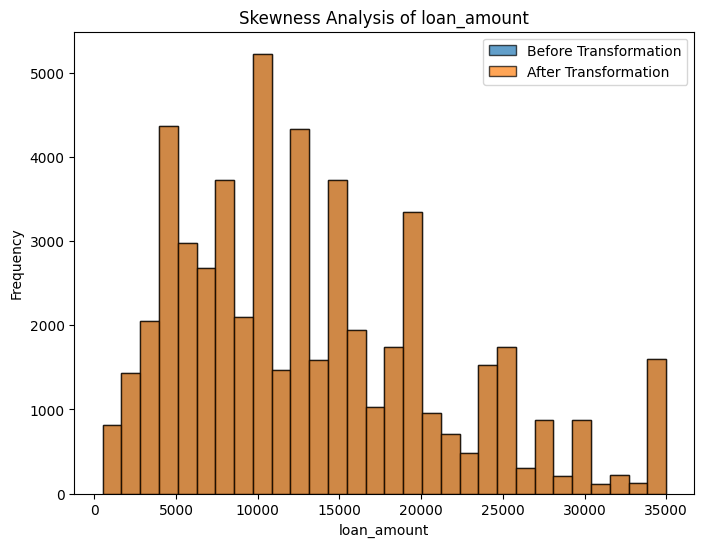

In [12]:

analyzer_before.visualize_skewness(skewed_columns[2])

In [13]:
# Apply transformations
transformation_dict = processor_before.determine_best_transformation(skewed_columns)
processor_before.apply_transformations(transformation_dict)

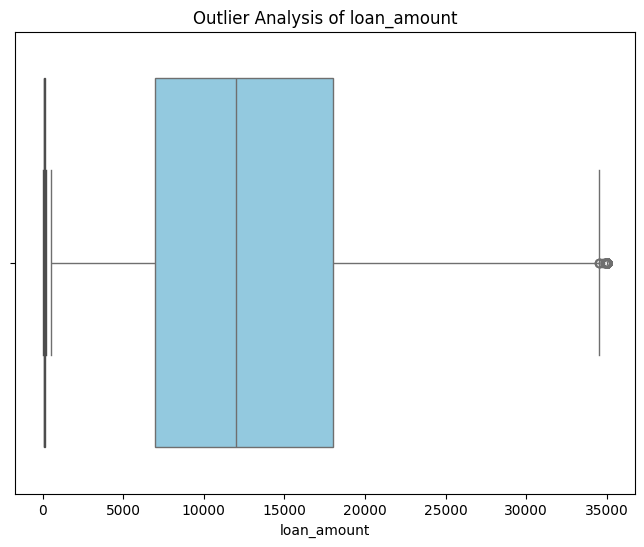

In [14]:
# Visualize outliers before removal
outliers_before = processor_before.identify_outliers(skewed_columns)
analyzer_before.visualize_outliers(outliers_before.columns[2])

In [15]:
highly_correlated_columns_before = processor_before.identify_highly_correlated_columns()
processor_before.drop_highly_correlated_columns()

,id,loan_amount,term,int_rate,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,...,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,17,89,36 months,7.49,A,A4,5 years,MORTGAGE,10.736418,Not Verified,...,8.618070,22.632057,0.000000,0.00000,Jan-2022,5.520741,Jan-2022,0.000000,1,INDIVIDUAL
1,17,114,36 months,6.99,A,A3,9 years,RENT,10.819798,Not Verified,...,9.116450,28.070269,0.000000,0.00000,Jan-2022,6.012541,Jan-2022,0.000000,1,INDIVIDUAL
2,17,126,36 months,7.49,A,A4,8 years,MORTGAGE,11.210658,Source Verified,...,0.000000,28.714805,0.000000,0.00000,Oct-2021,9.461189,Oct-2021,0.000000,1,INDIVIDUAL
3,17,122,36 months,14.31,C,C4,1 year,RENT,10.645449,Source Verified,...,0.000000,30.781001,0.000000,0.00000,Jun-2021,9.539692,Jun-2021,0.000000,1,INDIVIDUAL
4,17,122,36 months,6.03,A,A1,10+ years,MORTGAGE,11.884496,Verified,...,9.239751,27.765626,0.000000,0.00000,Jan-2022,6.125864,Jan-2022,0.000000,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,11,70,36 months,9.01,B,B2,1 year,MORTGAGE,12.429220,Not Verified,...,0.000000,26.922481,0.000000,0.00000,Jul-2016,5.085186,Jul-2016,0.064871,1,INDIVIDUAL
54227,11,70,36 months,10.59,C,C2,< 1 year,RENT,9.615872,Not Verified,...,0.000000,28.745608,4.662895,0.00000,Oct-2016,6.196464,Sep-2016,0.000000,1,INDIVIDUAL
54228,11,59,36 months,7.43,A,A2,10+ years,MORTGAGE,12.611541,Not Verified,...,0.000000,20.380628,0.000000,0.00000,Sep-2016,4.714742,May-2013,0.064871,1,INDIVIDUAL
54229,11,70,36 months,7.43,A,A2,4 years,RENT,12.206078,Not Verified,...,0.000000,13.197727,0.000000,0.00000,Mar-2014,0.000000,May-2013,0.064871,1,INDIVIDUAL


In [16]:
# Save a copy for comparison
processor_before.save_copy_for_comparison('before_transformations.csv')

In [17]:
# Data processing after transformation
processor_after = DataProcessor(df)

In [18]:
# Visualize null values after imputation
processor_after.check_null_after_imputation()

                             Null Counts  Percentage Null
id                                     0         0.000000
member_id                              0         0.000000
loan_amount                            0         0.000000
funded_amount                       3007         5.544799
funded_amount_inv                      0         0.000000
term                                4772         8.799395
int_rate                            5169         9.531449
instalment                             0         0.000000
grade                                  0         0.000000
sub_grade                              0         0.000000
employment_length                   2118         3.905515
home_ownership                         0         0.000000
annual_inc                             0         0.000000
verification_status                    0         0.000000
issue_date                             0         0.000000
loan_status                            0         0.000000
payment_plan  

,Null Counts,Percentage Null
id,0,0.000000
member_id,0,0.000000
loan_amount,0,0.000000
funded_amount,3007,5.544799
funded_amount_inv,0,0.000000
term,4772,8.799395
int_rate,5169,9.531449
instalment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [19]:
# Remove missing columns
processor_after.drop_missing_columns()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,Jan-2022,248.82,Jan-2022,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,Jan-2022,407.52,Jan-2022,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,Oct-2021,12850.16,Oct-2021,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,Jun-2021,13899.67,Jun-2021,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,Jan-2022,456.54,Jan-2022,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,Jul-2016,160.61,Jul-2016,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,Oct-2016,490.01,Sep-2016,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,Sep-2016,110.58,May-2013,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,Mar-2014,0.00,May-2013,NaN,1,INDIVIDUAL


In [20]:
# Impute missing values
processor_after.impute_missing_values()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,Jan-2022,248.82,Jan-2022,0.000000,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,Jan-2022,407.52,Jan-2022,0.000000,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,Oct-2021,12850.16,Oct-2021,0.000000,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,Jun-2021,13899.67,Jun-2021,0.000000,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,Jan-2022,456.54,Jan-2022,0.000000,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,Jul-2016,160.61,Jul-2016,0.004208,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,Oct-2016,490.01,Sep-2016,0.000000,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,Sep-2016,110.58,May-2013,0.004208,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,Mar-2014,0.00,May-2013,0.004208,1,INDIVIDUAL


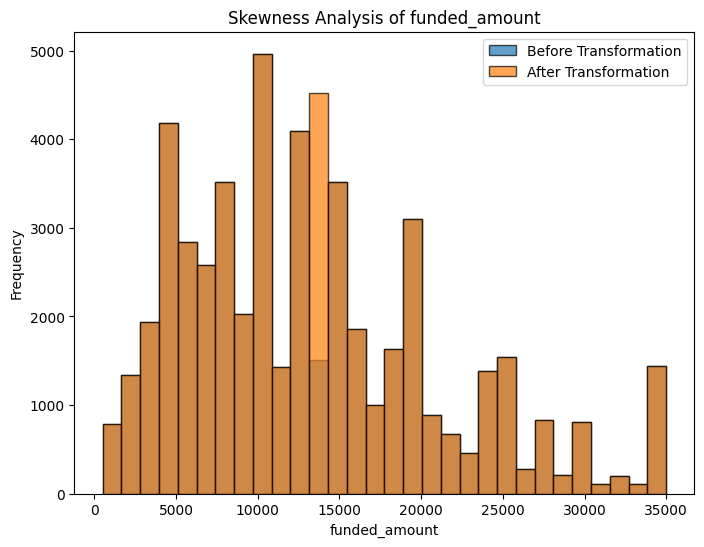

In [21]:
# Identify and visualize skewed columns
skewed_columns_after = processor_after.identify_skewed_columns()
analyzer_after = DataAnalyzer(processor_after.df_before, processor_after.df_after)
analyzer_after.visualize_skewness(skewed_columns_after[3])

In [22]:
# Apply transformations
transformation_dict_after = processor_after.determine_best_transformation(skewed_columns_after)
processor_after.apply_transformations(transformation_dict_after)

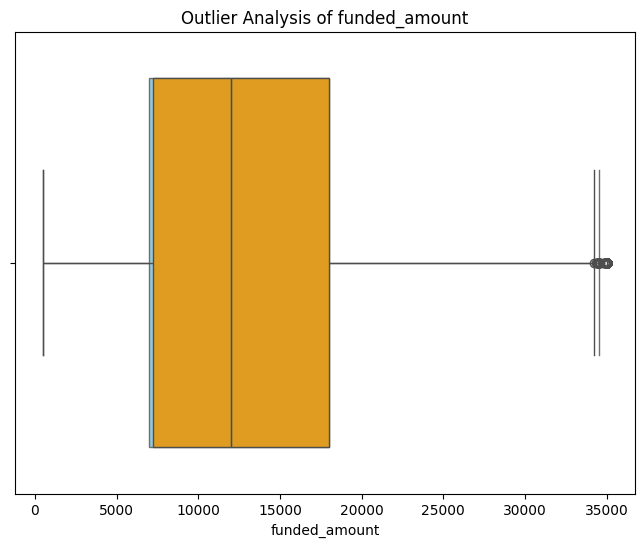

In [23]:
# Visualize outliers after removal
outliers_after = processor_after.identify_outliers(skewed_columns_after)
analyzer_after.visualize_outliers(outliers_after.columns[3])

In [24]:
# Identify and remove highly correlated columns
highly_correlated_columns_after = processor_after.identify_highly_correlated_columns()
processor_after.drop_highly_correlated_columns()

,id,loan_amount,term,int_rate,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,...,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,17,89,36 months,7.49,A,A4,5 years,MORTGAGE,10.736418,Not Verified,...,8.618070,22.632057,0.000000,0.00000,Jan-2022,5.520741,Jan-2022,0.000000,1,INDIVIDUAL
1,17,114,36 months,6.99,A,A3,9 years,RENT,10.819798,Not Verified,...,9.116450,28.070269,0.000000,0.00000,Jan-2022,6.012541,Jan-2022,0.000000,1,INDIVIDUAL
2,17,126,36 months,7.49,A,A4,8 years,MORTGAGE,11.210658,Source Verified,...,0.000000,28.714805,0.000000,0.00000,Oct-2021,9.461189,Oct-2021,0.000000,1,INDIVIDUAL
3,17,122,36 months,14.31,C,C4,1 year,RENT,10.645449,Source Verified,...,0.000000,30.781001,0.000000,0.00000,Jun-2021,9.539692,Jun-2021,0.000000,1,INDIVIDUAL
4,17,122,36 months,6.03,A,A1,10+ years,MORTGAGE,11.884496,Verified,...,9.239751,27.765626,0.000000,0.00000,Jan-2022,6.125864,Jan-2022,0.000000,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,11,70,36 months,9.01,B,B2,1 year,MORTGAGE,12.429220,Not Verified,...,0.000000,26.922481,0.000000,0.00000,Jul-2016,5.085186,Jul-2016,0.064871,1,INDIVIDUAL
54227,11,70,36 months,10.59,C,C2,< 1 year,RENT,9.615872,Not Verified,...,0.000000,28.745608,4.662895,0.00000,Oct-2016,6.196464,Sep-2016,0.000000,1,INDIVIDUAL
54228,11,59,36 months,7.43,A,A2,10+ years,MORTGAGE,12.611541,Not Verified,...,0.000000,20.380628,0.000000,0.00000,Sep-2016,4.714742,May-2013,0.064871,1,INDIVIDUAL
54229,11,70,36 months,7.43,A,A2,4 years,RENT,12.206078,Not Verified,...,0.000000,13.197727,0.000000,0.00000,Mar-2014,0.000000,May-2013,0.064871,1,INDIVIDUAL


In [25]:
# Save a copy after transformation and correlation removal
processor_after.save_copy_after_correlation_removal('after_transformations.csv')

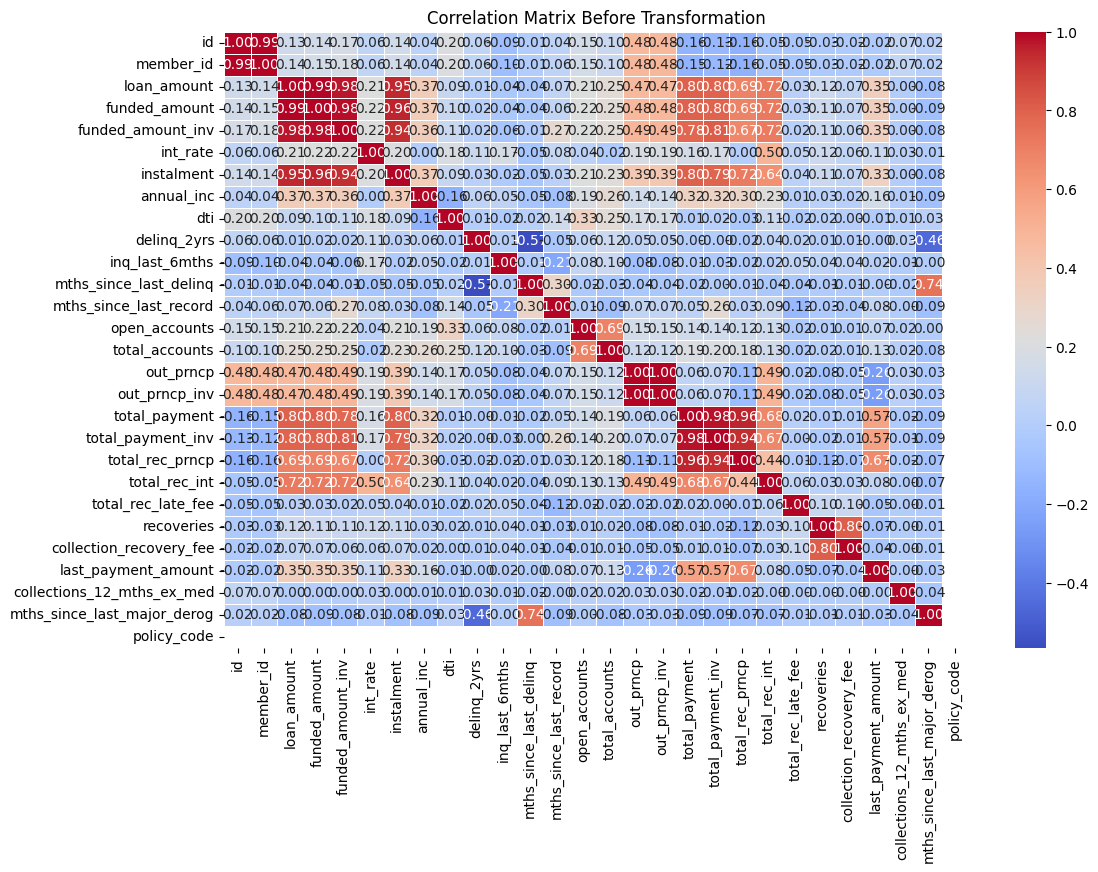

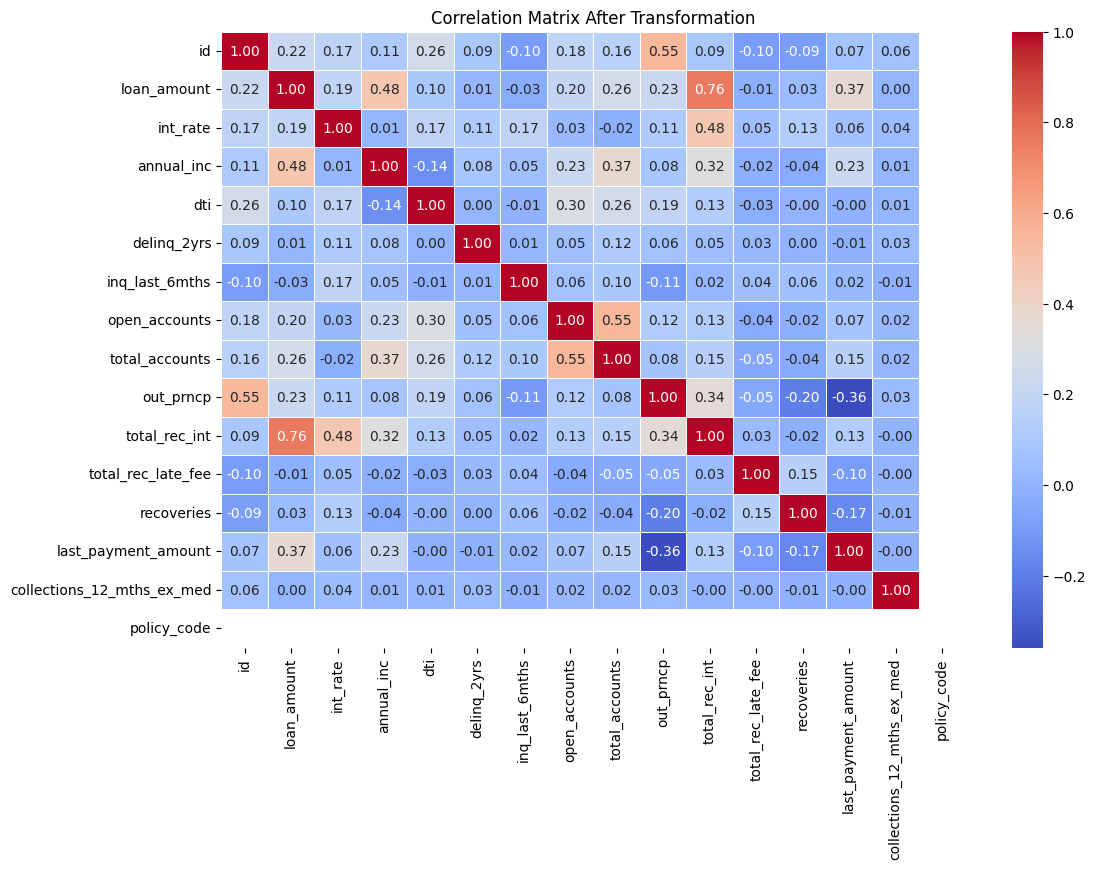

In [26]:
# Visualize correlation matrix before and after
correlation_matrix_before = df.corr(numeric_only=True)
correlation_matrix_after = processor_after.df.corr(numeric_only=True)

analyzer_before.visualize_correlation_matrix('Correlation Matrix Before Transformation', correlation_matrix_before)
analyzer_after.visualize_correlation_matrix('Correlation Matrix After Transformation', correlation_matrix_after)



In [27]:
# Calculate the percentage of loans recovered against investor funding
df['recovery_percentage_investor'] = (df['total_payment'] / df['funded_amount_inv']) * 100

In [28]:
# Calculate the percentage of loans recovered against the total amount funded
df['recovery_percentage_total'] = (df['total_payment_inv'] / df['funded_amount']) * 100

In [29]:
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'])
current_date = pd.to_datetime('today')
df['months_until_next_payment'] = ((df['next_payment_date'] - current_date) / pd.Timedelta(days=30)).fillna(0).astype(int)
df['recovery_percentage_future'] = (df['total_rec_prncp'] / df['funded_amount']) * 100

C:\Users\timur\AppData\Local\Temp\ipykernel_18840\643711150.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['next_payment_date'] = pd.to_datetime(df['next_payment_date'])


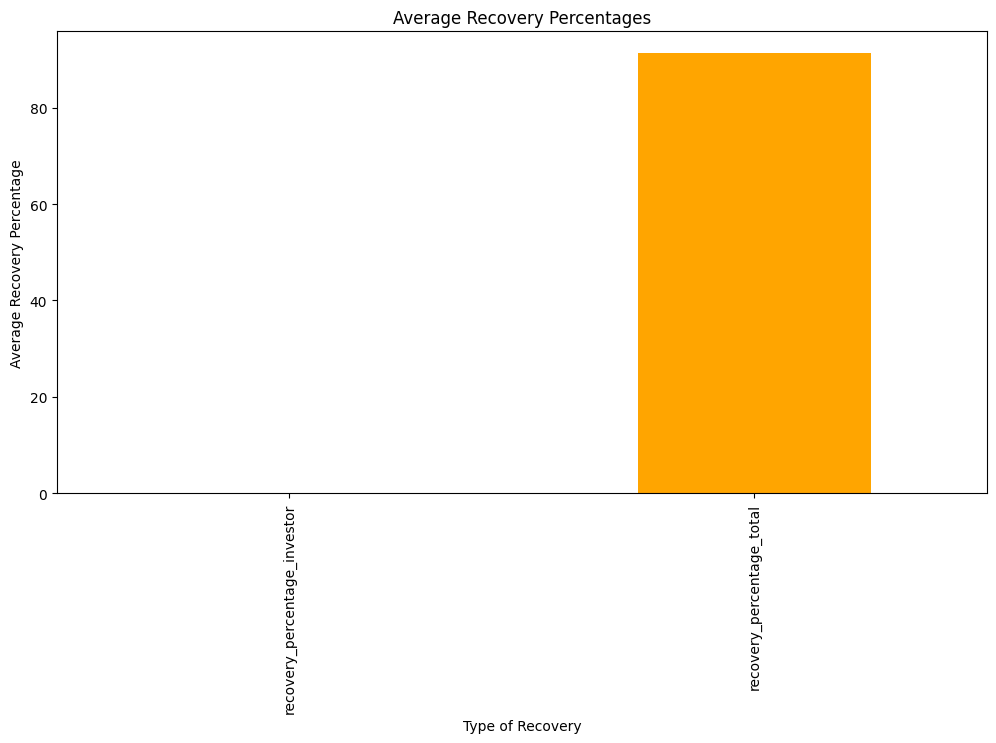

In [30]:
# Bar plot for recovery percentages against investor funding and total funding
plt.figure(figsize=(12, 6))
df[['recovery_percentage_investor', 'recovery_percentage_total']].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Recovery Percentages')
plt.xlabel('Type of Recovery')
plt.ylabel('Average Recovery Percentage')
plt.show()

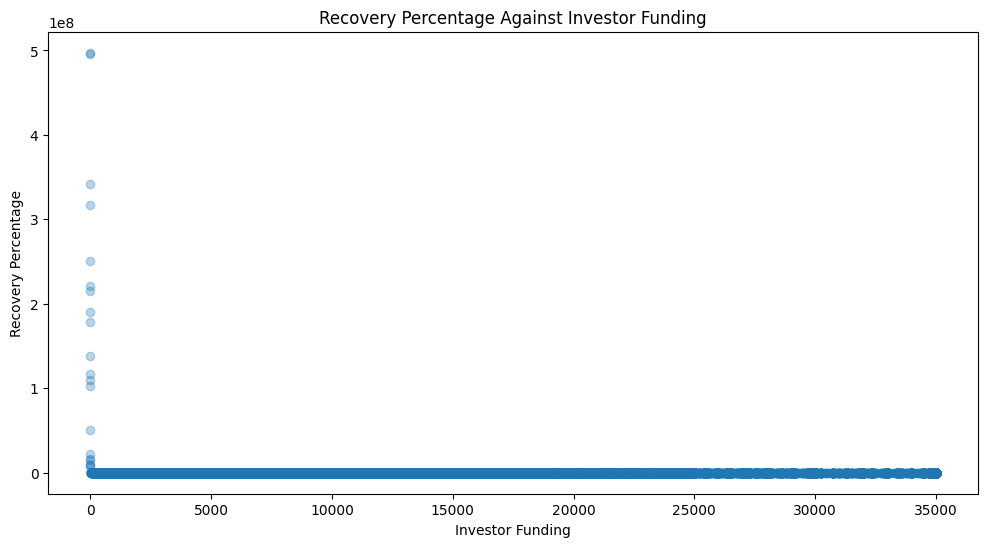

In [31]:
# Scatter plot for recovery percentage against investor funding
plt.figure(figsize=(12, 6))
plt.scatter(df['funded_amount_inv'], df['recovery_percentage_investor'], alpha=0.3)
plt.title('Recovery Percentage Against Investor Funding')
plt.xlabel('Investor Funding')
plt.ylabel('Recovery Percentage')
plt.show()

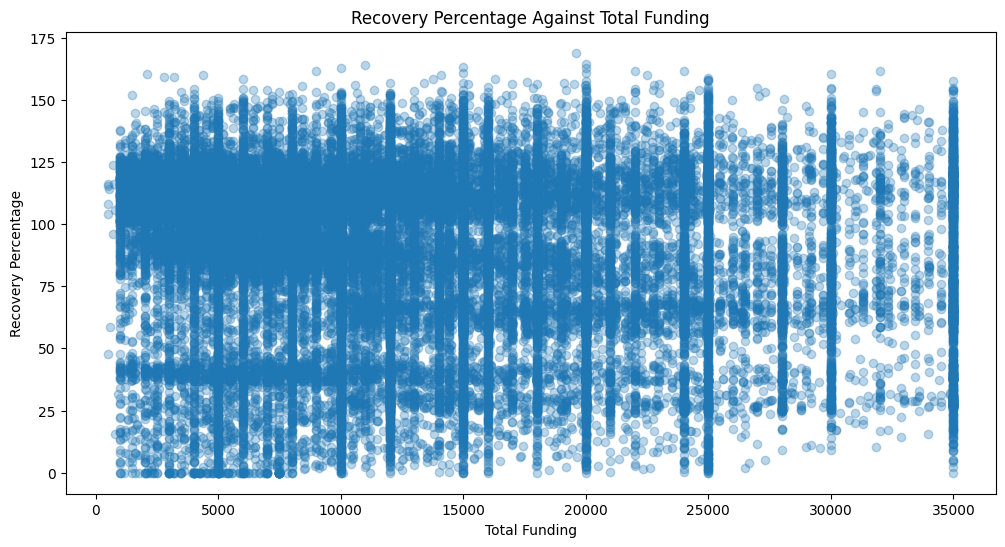

In [32]:
# Scatter plot for recovery percentage against total funding
plt.figure(figsize=(12, 6))
plt.scatter(df['funded_amount'], df['recovery_percentage_total'], alpha=0.3)
plt.title('Recovery Percentage Against Total Funding')
plt.xlabel('Total Funding')
plt.ylabel('Recovery Percentage')
plt.show()

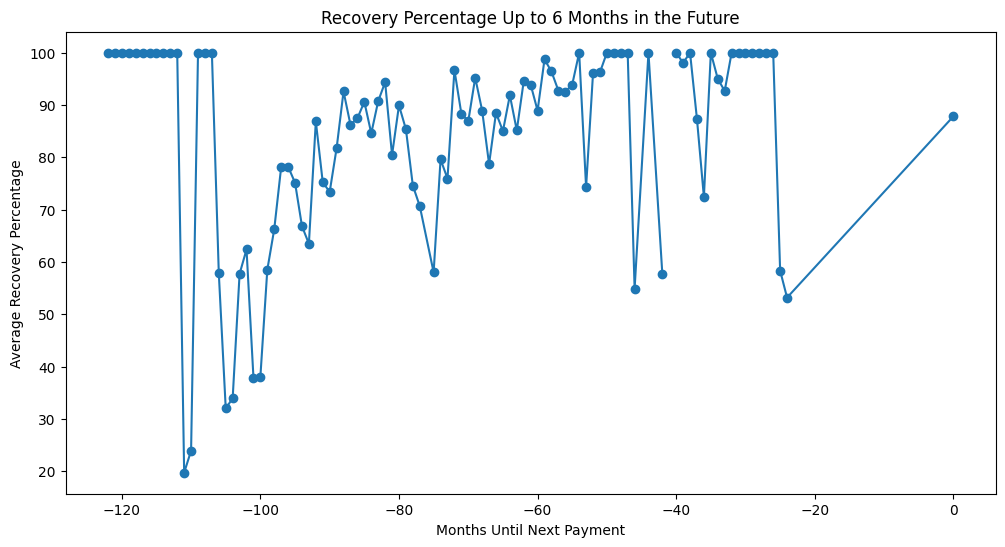

In [33]:
# Line plot for recovery percentage up to 6 months in the future
plt.figure(figsize=(12, 6))
df_future = df[df['months_until_next_payment'] <= 6]
plt.plot(df_future.groupby('months_until_next_payment')['recovery_percentage_future'].mean(), marker='o')
plt.title('Recovery Percentage Up to 6 Months in the Future')
plt.xlabel('Months Until Next Payment')
plt.ylabel('Average Recovery Percentage')
plt.show()

In [34]:
# Filter charged off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off']


In [35]:
# Calculate the percentage of charged off loans historically
charged_off_percentage = (charged_off_loans.shape[0] / df.shape[0]) * 100

In [36]:
# Calculate the total amount paid towards charged off loans
total_paid_charged_off = charged_off_loans['total_payment'].sum()

print(f"Percentage of Charged Off Loans: {charged_off_percentage:.2f}%")
print(f"Total Amount Paid Towards Charged Off Loans: ${total_paid_charged_off:,.2f}")

Percentage of Charged Off Loans: 10.27%
Total Amount Paid Towards Charged Off Loans: $37,400,589.04


In [37]:
print(charged_off_loans.head())

           id  member_id  loan_amount  funded_amount  funded_amount_inv  \
7    38656067   41439872        26500        26500.0            26200.0   
56   38654836   41438603        11200        11200.0            11200.0   
83   38645937   41429742         1325         1325.0             1325.0   
90   38645713   41429516         8150         8150.0             8150.0   
117  38644867   41428644         7000         7000.0             7000.0   

          term  int_rate  instalment grade sub_grade  ... next_payment_date  \
7          NaN     19.99      701.95     E        E3  ...               NaT   
56   60 months     16.49      275.29     D        D3  ...               NaT   
83   36 months     17.14       47.34     D        D4  ...               NaT   
90   36 months     19.99      302.85     E        E3  ...               NaT   
117  36 months     12.99      235.83     C        C2  ...               NaT   

    last_credit_pull_date  collections_12_mths_ex_med  \
7                

In [38]:
charged_off_loans['term_numeric'] = charged_off_loans['term'].astype(str).str.extract('(\d+)').astype(float)

C:\Users\timur\AppData\Local\Temp\ipykernel_18840\24641101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['term_numeric'] = charged_off_loans['term'].astype(str).str.extract('(\d+)').astype(float)


In [39]:
# Fill NaN values in 'term_numeric' with 0 (or any other suitable value)
charged_off_loans['term_numeric'] = charged_off_loans['term_numeric'].fillna(0)


C:\Users\timur\AppData\Local\Temp\ipykernel_18840\215329940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['term_numeric'] = charged_off_loans['term_numeric'].fillna(0)


In [40]:
print(charged_off_loans['instalment'].isnull().sum())

0


In [41]:
charged_off_loans['projected_loss'] = charged_off_loans['term_numeric'] * charged_off_loans['instalment']

C:\Users\timur\AppData\Local\Temp\ipykernel_18840\1527670661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['projected_loss'] = charged_off_loans['term_numeric'] * charged_off_loans['instalment']


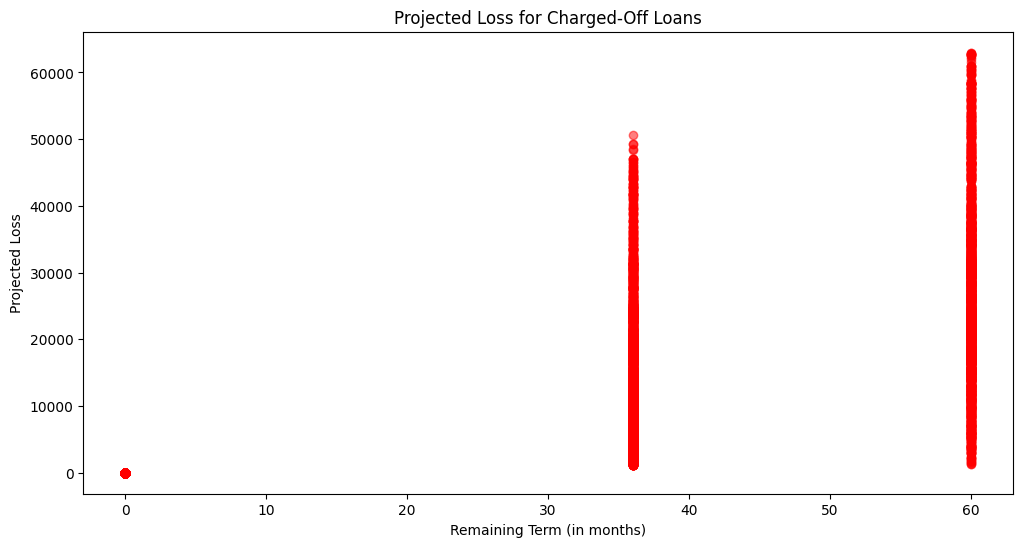

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(charged_off_loans['term_numeric'], charged_off_loans['projected_loss'], color='red', alpha=0.5)
plt.title('Projected Loss for Charged-Off Loans')
plt.xlabel('Remaining Term (in months)')
plt.ylabel('Projected Loss')
plt.show()

In [43]:
# Identify customers currently behind with their loan payments
late_payments = df[df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)'])]

In [44]:
# Calculate the percentage of late payments relative to all loans
percentage_late_payments = (len(late_payments) / len(df)) * 100

In [45]:
# Calculate the total number of customers with late payments
total_late_customers = len(late_payments)

In [46]:
# Calculate the loss if the status of these late payments were changed to Charged Off
loss_due_to_late_payments = late_payments['total_payment'].sum()

In [47]:
# Calculate the projected loss of these loans if customers were to finish the full loan term
late_payments['term_numeric'] = late_payments['term'].astype(str).str.extract('(\d+)').astype(float)
late_payments['projected_loss'] = late_payments['term_numeric'] * late_payments['instalment']
total_projected_loss = late_payments['projected_loss'].sum()

C:\Users\timur\AppData\Local\Temp\ipykernel_18840\2717129284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_payments['term_numeric'] = late_payments['term'].astype(str).str.extract('(\d+)').astype(float)
C:\Users\timur\AppData\Local\Temp\ipykernel_18840\2717129284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_payments['projected_loss'] = late_payments['term_numeric'] * late_payments['instalment']


In [48]:
# Calculate the total expected revenue
total_expected_revenue = df['total_payment'].sum()

In [49]:
# Calculate the percentage of total expected revenue represented by late payments
percentage_of_total_revenue = (loss_due_to_late_payments + total_projected_loss) / total_expected_revenue * 100

In [50]:
# Display the results
print(f"Percentage of late payments relative to all loans: {percentage_late_payments:.2f}%")
print(f"Total number of customers with late payments: {total_late_customers}")
print(f"Loss due to late payments if status changed to Charged Off: ${loss_due_to_late_payments:,.2f}")
print(f"Projected loss of late payments if customers finish full term: ${total_projected_loss:,.2f}")
print(f"Percentage of total expected revenue represented by late payments: {percentage_of_total_revenue:.2f}%")

Percentage of late payments relative to all loans: 1.26%
Total number of customers with late payments: 686
Loss due to late payments if status changed to Charged Off: $6,894,024.95
Projected loss of late payments if customers finish full term: $13,117,324.68
Percentage of total expected revenue represented by late payments: 3.05%


In [51]:
# Create a subset of users with relevant columns
subset_df = df[['loan_status', 'grade', 'purpose', 'home_ownership']]

In [52]:
# Filter data for Charged Off and Late payments
charged_off = subset_df[subset_df['loan_status'] == 'Charged Off']
late_payments = subset_df[subset_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)'])]

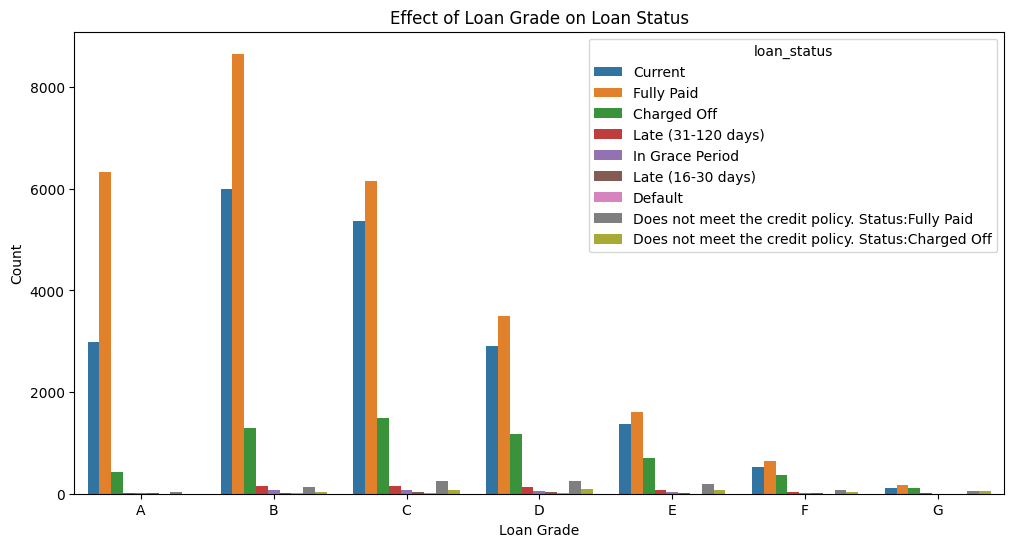

In [53]:
# Visualize the effect of loan grade on customers not paying
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=subset_df, order=sorted(subset_df['grade'].unique()))
plt.title('Effect of Loan Grade on Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

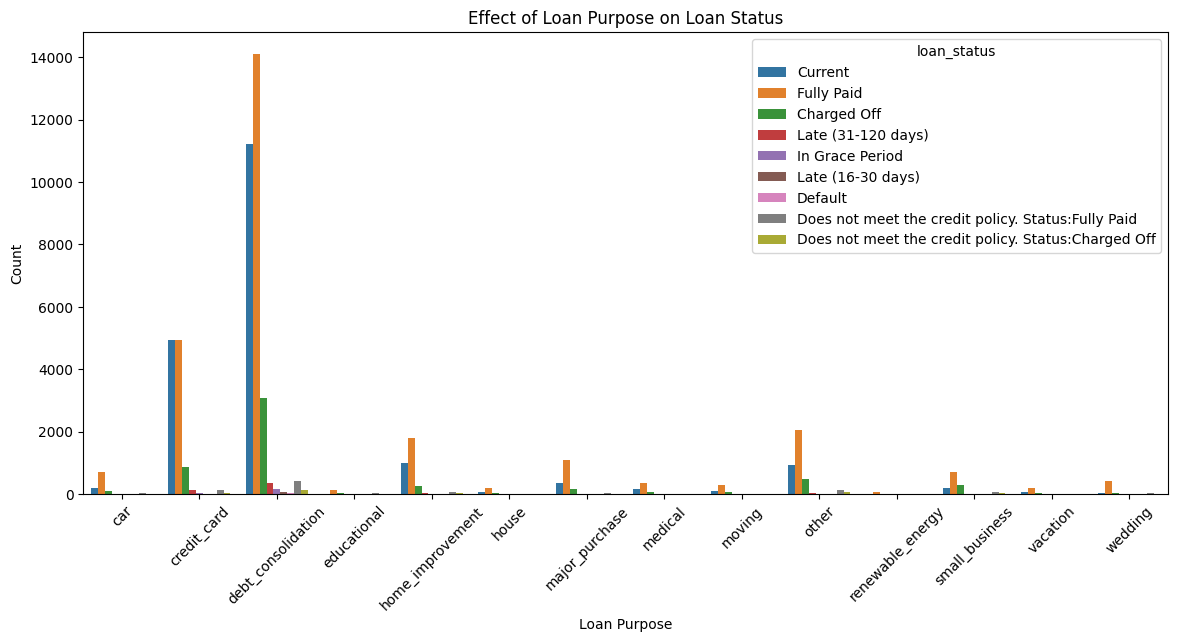

In [54]:
# Visualize the effect of loan purpose on customers not paying
plt.figure(figsize=(14, 6))
sns.countplot(x='purpose', hue='loan_status', data=subset_df, order=sorted(subset_df['purpose'].unique()))
plt.title('Effect of Loan Purpose on Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

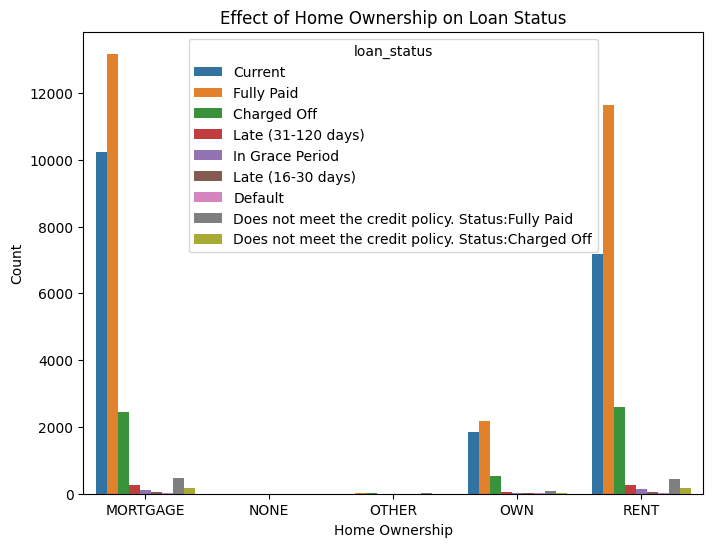

In [55]:
# Visualize the effect of home ownership on customers not paying
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=subset_df, order=sorted(subset_df['home_ownership'].unique()))
plt.title('Effect of Home Ownership on Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()